# Neural netwerk met matrices #

Training is klaar bij epoch:  879
Cost:  0.009993482087786427


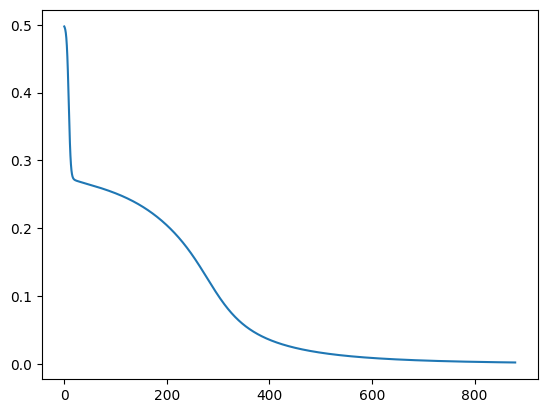

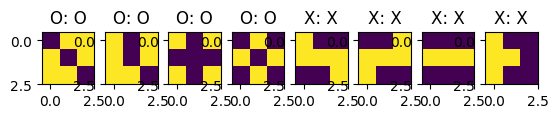

In [38]:
import numpy as np
import random
from matplotlib import pyplot as plt
from data import training_set, test_set

def train(learning_rate, epochs):
    global maxCost, input_nodes, weights_hidden, weights_input, bias_output, bias_hidden
    plotdata = []
    for epoch in range(epochs):
        epoch_loss = 0
        for example, target in training_set:
            inputs = np.array(example).flatten().reshape(-1, 1)
            input_nodes = inputs
                        
            # Forward pass
            # print("bias_hidden ",bias_hidden.shape)
            # print("bias_hidden ",bias_hidden)
            # print("dotproduct ",np.dot(input_nodes.T, weights_input).shape)
            hidden_nodes = np.dot(input_nodes.T, weights_input) + bias_hidden
            hidden_nodes = sigmoid(hidden_nodes)
            # print("hidden_nodes", hidden_nodes.shape)

            # print("bias_output ",bias_output.shape)
            # print("bias_output ",bias_output)
            # print("dotproduct ",np.dot(hidden_nodes, weights_hidden).shape)

            output_nodes = np.dot(hidden_nodes, weights_hidden) + bias_output
            output_nodes = sigmoid(output_nodes)                
            # print("output_nodes " ,output_nodes.shape)

            targets = [1.0, 0.0] if target == "O" else [0.0, 1.0]

            # Backward propogation
            output_error = np.subtract(targets, output_nodes) 
            output_delta = output_error * sigmoid_derivative(output_nodes)

            hidden_error = output_delta.dot(weights_hidden.T)
            hidden_delta = hidden_error * sigmoid_derivative(hidden_nodes)

            weights_hidden += hidden_nodes.T.dot(output_delta) * learning_rate
            weights_input  += input_nodes.dot(hidden_delta) * learning_rate

            bias_output += np.sum(output_delta, axis=0) * learning_rate
            bias_hidden += np.sum(hidden_delta, axis=0) * learning_rate

            # Compute the loss (mean squared error)
            epoch_loss += np.mean(np.square(output_error))

        plotdata.append(epoch_loss/len(training_set))

        # Print average loss for the epoch
        # print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(training_set)}")

        if(epoch_loss < maxCost):
            print("Training is klaar bij epoch: ", epoch)
            print("Cost: ", epoch_loss)
            plt.plot(np.arange(epoch+1),plotdata)
            return
    print("Cost: ", epoch_loss)
    plt.plot(np.arange(epoch+1),plotdata)
        
def forward():
    global input_nodes, weights_input, weights_hidden, biases

    # Forward pass
    hidden_nodes = np.dot(input_nodes.T, weights_input) + bias_hidden
    hidden_nodes = sigmoid(hidden_nodes)

    output_nodes = np.dot(hidden_nodes, weights_hidden) + bias_output
    output_nodes = sigmoid(output_nodes)
    return output_nodes[0]
    
def predict(inputs):
    global input_nodes
    # Forward pass
    input_nodes = inputs
    output_nodes = forward()
    return output_nodes

def softmax(input):
    output = np.exp(input) / sum(np.exp(node) for node in input)
    return output

def sigmoid(input):
    output = 1 / (1 + np.exp(-input)) 
    return output

def sigmoid_derivative(input):
    x = sigmoid(input)
    output = x * (1- x)
    return output

input_size = 9
output_size = 2
hidden_size = 15
learning_rate = 0.1
epochs = 20000
maxCost = 0.01  

input_node = np.zeros(input_size).reshape(-1, 1)
hidden_nodes = np.zeros(hidden_size).reshape(-1, 1)
output_nodes = np.zeros(output_size).reshape(-1, 1)
weights_input = np.random.rand(input_size, hidden_size)
weights_hidden = np.random.rand(hidden_size, output_size)

bias_output = np.zeros((output_size, 1)).reshape(1, -1)
bias_hidden = np.zeros((hidden_size, 1)).reshape(1, -1)

train(learning_rate, epochs)
# print(weights_input)

figure, axis = plt.subplots(1,len(test_set)) 
for i in range(len(test_set)):
    inputs = np.array(test_set[i][0]).flatten()
    
    prediction = predict(inputs)
    # print("prediction", prediction)

    axis[i].imshow(test_set[i][0])
    antwoord = "O" if prediction[0] > prediction[1] else "X"
    title  = f"{test_set[i][1]}: {antwoord}"
    axis[i].set_title(title)   